# Chapter 7: Support Vector Machines and Kernel Methods

This notebook provides practical "recipes" for Support Vector Machines (SVMs). Each recipe includes explanations, code examples, visualizations, best practices, and common pitfalls when applicable.

## Introduction to SVMs
SVMs are powerful machine learning models used for both classification and regression tasks. SVMs are particularly effective in situations where the number of features is large compared to the number of samples, or when the data is high-dimensional. The core idea behind SVMs is to find the hyperplane that maximizes the margin between classes, which helps in achieving better generalization performance. In this section, we will explore the basics of SVMs, their role in classification and regression, and how they work.

### Getting ready
Before implementing SVMs, let’s ensure we have the necessary Python libraries installed and the dataset loaded:

In [1]:
# Load libraries 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)


### How to do it
Now let's implement SVM for classification and regression tasks.

In [2]:
# Load the model
svm_classifier = SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Stylize the DataFrame
styled_df = (report_df
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}', 
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)

print(f"Accuracy: {accuracy:.2f}")
styled_df


Accuracy: 0.93


,precision,recall,f1-score,support
0,1.000,1.000,1.000,18
1,0.909,0.833,0.870,12
2,0.875,0.933,0.903,15
accuracy,0.933,0.933,0.933,1
macro avg,0.928,0.922,0.924,45
weighted avg,0.934,0.933,0.933,45


Now let's apply SVM to regression and evaluate our results.

In [3]:
# Load the model
svm_regressor = SVR(kernel='rbf')

# Train the model
svm_regressor.fit(X_train[:, :2], y_train)

# Make predictions
y_pred_reg = svm_regressor.predict(X_test[:, :2])

# Evaluate the model
# Note: For regression, we typically use metrics like MSE or R-squared
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_reg)
print(f"MSE: {mse:.2f}")


MSE: 0.20


### How it works
SVMs work by finding the hyperplane that maximizes the margin between classes. The margin is the distance between the hyperplane and the nearest data points of each class, known as support vectors. SVMs can handle non-linearly separable data by using kernel functions, which map the data into higher-dimensional spaces where it becomes linearly separable.

* Kernel Functions: Common kernels include linear, polynomial, and radial basis function (RBF). The choice of kernel depends on the complexity of the data and the problem at hand.

* Soft Margin: SVMs can tolerate some misclassifications by introducing slack variables, allowing for a "soft margin" that improves robustness against outliers.

Visualizing the decision boundaries of SVMs can provide insights into how they classify data. For linear SVMs, the decision boundary is a line that maximizes the margin between classes.

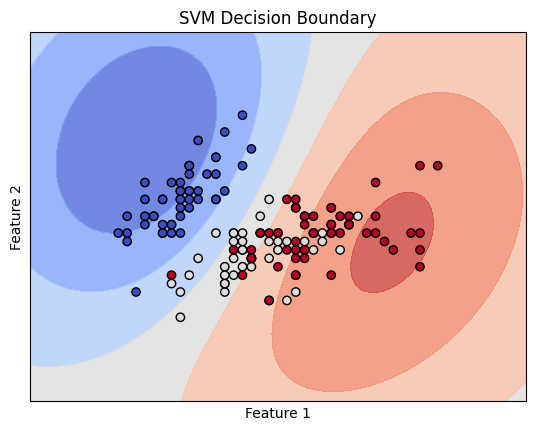

In [4]:
# Load the libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Adjust the input to match the expected number of features
# Use all four features for prediction, but only visualize the first two
grid_points = np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], 2))]

# Plot decision boundaries using DecisionBoundaryDisplay
fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    svm_regressor,
    grid_points[:, :2],
    response_method="predict",
    plot_method="contourf",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax
)

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
ax.set_title("SVM Decision Boundary")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.show()


## Kernel Functions and Their Applications
Kernel functions are the critical element that give SVMs their power, allowing them to handle non-linear data effectively. By mapping the original data into a higher-dimensional space, kernel functions enable SVMs to find linear decision boundaries in this new space, which correspond to non-linear boundaries in the original space

### Getting ready
Before implementing kernel functions with SVMs, let’s ensure we have the necessary Python libraries installed and the dataset loaded:

In [5]:
# Load the libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)


### How to do it
Now let's implement SVMs using different kernel functions. We already used the linear kernel in the first example so now let’s use the Polynomial Kernel:

In [6]:
# Load the model
svm_poly = SVC(kernel='poly', degree=3)

# Train the model
svm_poly.fit(X_train, y_train)

# Make predictions
y_pred_poly = svm_poly.predict(X_test)

# Evaluate the model
accuracy_poly = accuracy_score(y_test, y_pred_poly)
report_poly = classification_report(y_test, y_pred_poly, output_dict=True)
report_df_poly = pd.DataFrame(report_poly).transpose()

# Stylize the DataFrame
styled_df_poly = (report_df_poly
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}', 
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)

print(f"Polynomial Kernel Accuracy: {accuracy_poly:.2f}")
styled_df_poly


Polynomial Kernel Accuracy: 0.96


,precision,recall,f1-score,support
0,1.000,1.000,1.000,18
1,1.000,0.833,0.909,12
2,0.882,1.000,0.938,15
accuracy,0.956,0.956,0.956,1
macro avg,0.961,0.944,0.949,45
weighted avg,0.961,0.956,0.955,45


Now with the RBF Kernel:

In [7]:
# Load the model
svm_rbf = SVC(kernel='rbf')

# Train the model
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
report_rbf = classification_report(y_test, y_pred_rbf, output_dict=True)
report_df_rbf = pd.DataFrame(report_rbf).transpose()

# Stylize the DataFrame
styled_df_rbf = (report_df_rbf
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}', 
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)

print(f"RBF Kernel Accuracy: {accuracy_rbf:.2f}")
styled_df_rbf


RBF Kernel Accuracy: 0.91


,precision,recall,f1-score,support
0,1.000,1.000,1.000,18
1,0.786,0.917,0.846,12
2,0.923,0.800,0.857,15
accuracy,0.911,0.911,0.911,1
macro avg,0.903,0.906,0.901,45
weighted avg,0.917,0.911,0.911,45


Visualizing the decision boundaries of SVMs with different kernels can provide insights into how they classify data.

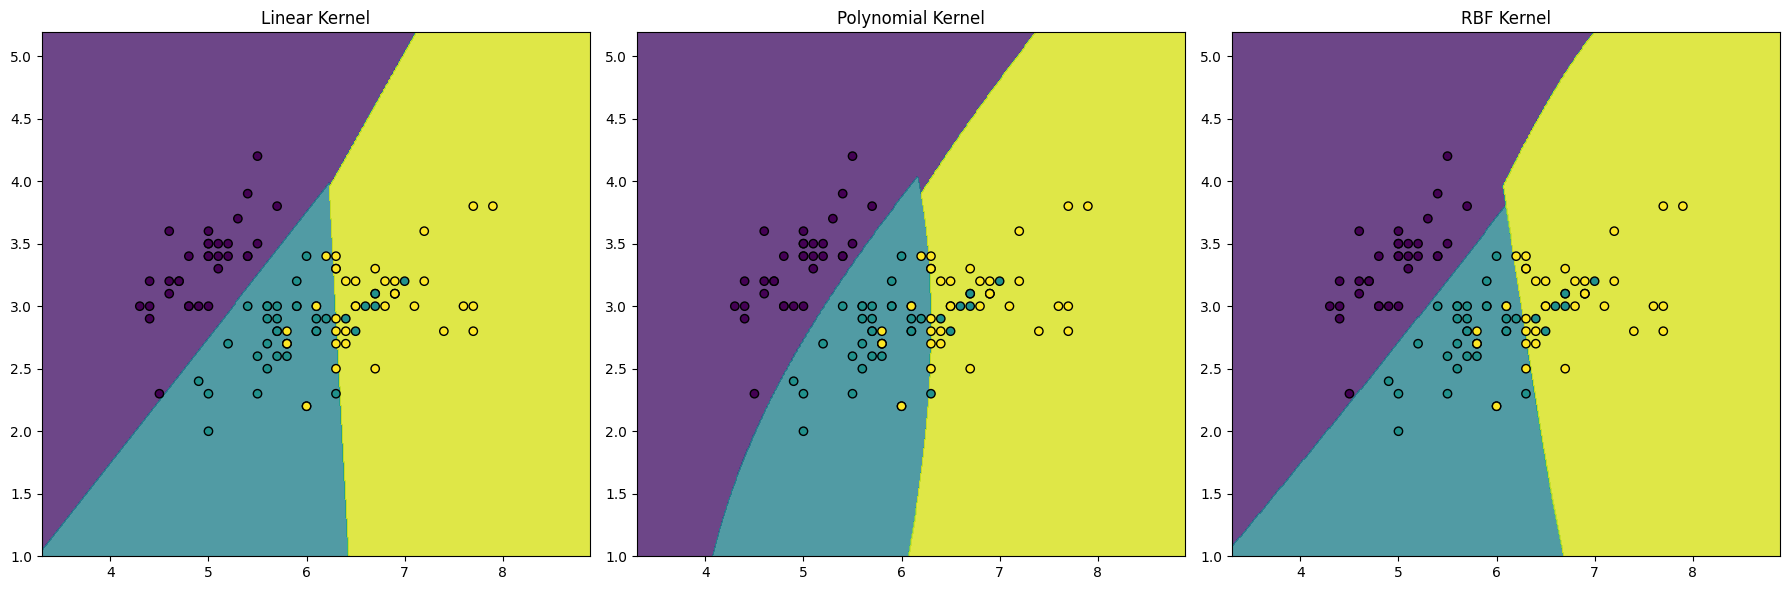

In [8]:
# Create a mesh grid using only the first two features for visualization
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Use only the first two features for prediction
X_train_2d = X_train[:, :2]

# Train new SVM models using only the first two features
svm_linear_2d = SVC(kernel='linear').fit(X_train_2d, y_train)
svm_poly_2d = SVC(kernel='poly').fit(X_train_2d, y_train)
svm_rbf_2d = SVC(kernel='rbf').fit(X_train_2d, y_train)

# Predict class probabilities across the grid for each kernel using only the first two features
Z_linear = svm_linear_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = svm_poly_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = svm_rbf_2d.predict(np.c_[xx.ravel(), yy.ravel()])

Z_linear = Z_linear.reshape(xx.shape)
Z_poly = Z_poly.reshape(xx.shape)
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].contourf(xx, yy, Z_linear, alpha=0.8)
axes[0].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o')
axes[0].set_title("Linear Kernel")

axes[1].contourf(xx, yy, Z_poly, alpha=0.8)
axes[1].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o')
axes[1].set_title("Polynomial Kernel")

axes[2].contourf(xx, yy, Z_rbf, alpha=0.8)
axes[2].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o')
axes[2].set_title("RBF Kernel")

plt.tight_layout()
plt.show()


## Tuning SVM Parameters
As we’ve seen with all other ML models up to this point, hyperparameter tuning and optimization is a key step in improving the performance of SVMs as well. By adjusting parameters such as the regularization parameter (C) and kernel parameters, we can significantly improve the accuracy and robustness of SVM models. In this section, we will discover how to use classic grid search and cross-validation techniques to optimize SVM models using scikit-learn.

### Getting ready
Before tuning SVM parameters, let’s ensure we have the necessary Python libraries installed and the dataset loaded:

In [9]:
# Load the libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

### How to do it
Now let's implement SVM parameter tuning using grid search and cross-validation:

In [10]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")

# Train a new model with the best hyperparameters
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# Stylize the DataFrame
styled_report_df = (report_df
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}', 
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)

print(f"Accuracy: {accuracy:.2f}")
styled_report_df


Best Parameters: {'C': 0.1, 'degree': 4, 'kernel': 'poly'}
Best Cross-Validation Score: 0.99
Accuracy: 0.93


,precision,recall,f1-score,support
0,1.000,1.000,1.000,18
1,0.909,0.833,0.870,12
2,0.875,0.933,0.903,15
accuracy,0.933,0.933,0.933,1
macro avg,0.928,0.922,0.924,45
weighted avg,0.934,0.933,0.933,45


### How it works

Grid search is a systematic approach to hyperparameter tuning that involves evaluating all possible combinations of parameters specified in a grid. Cross-validation is used to assess the performance of each combination, ensuring that the model generalizes well to unseen data.

* **Regularization Parameter (C)**: Controls the trade-off between margin and misclassification error. A high C value means the model is less tolerant of misclassifications.

* **Kernel Parameters**: Different kernels (e.g., linear, RBF, polynomial) and their parameters (e.g., degree for polynomial, gamma for RBF) affect how the data is mapped into higher-dimensional spaces.

Visualizing how different hyperparameters affect model performance can provide insights into the tuning process.

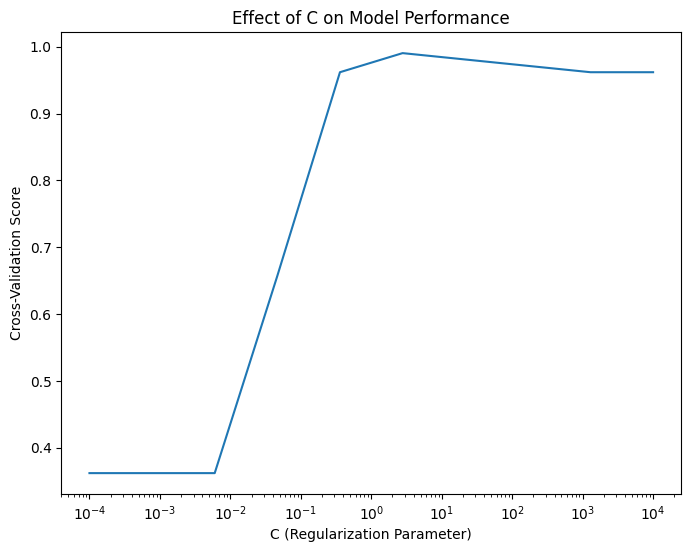

In [11]:
# Perform a grid search with a range of C values for a specific kernel
param_grid_c = {
    'C': np.logspace(-4, 4, 10),
    'kernel': ['rbf']
}
grid_search_c = GridSearchCV(SVC(), param_grid_c, cv=5)
grid_search_c.fit(X_train, y_train)

# Plot the cross-validation scores against C values
plt.figure(figsize=(8, 6))
plt.plot(grid_search_c.param_grid['C'], grid_search_c.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Cross-Validation Score')
plt.title('Effect of C on Model Performance')
plt.show()


## SVMs in High-Dimensional Spaces
SVMs are particularly effective in handling high-dimensional data, where the number of features is large compared to the number of samples. For example, maybe you are measuring a rare event but have several powerful instruments to gather hundreds of data points about them once they do occur. We call this a “wide” dataset. In this section, we will look more closely at how SVMs can be applied to high-dimensional data, both synthetically generated and from real-world datasets.

### Getting ready
Before applying SVMs to high-dimensional data, let’s ensure we have the necessary Python libraries installed and the dataset loaded:

In [12]:
# Load the libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Create a synthetic high-dimensional dataset
X, y = make_classification(n_samples=1000, n_features=1000, n_informative=50, n_redundant=0, random_state=2024)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

### How to do it...
Now let's implement SVMs for high-dimensional data.

In [13]:
# Load the model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# Stylize the DataFrame
styled_report_df = (report_df
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}', 
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)

print(f"Accuracy: {accuracy:.2f}")
styled_report_df


Accuracy: 0.75


,precision,recall,f1-score,support
0,0.765,0.765,0.765,162
1,0.725,0.725,0.725,138
accuracy,0.747,0.747,0.747,1
macro avg,0.745,0.745,0.745,300
weighted avg,0.747,0.747,0.747,300


### How It Works...

SVMs handle high-dimensional data efficiently by leveraging kernel functions. The choice of kernel depends on the nature of the data and the complexity of the decision boundary.
* **Linear Kernel**: Suitable for linearly separable data or when the number of features is large.
* **Non-Linear Kernels (e.g., RBF, Polynomial)**: Useful for non-linearly separable data, allowing SVMs to find complex decision boundaries.

Visualizing high-dimensional data directly is challenging, but we can use dimensionality reduction techniques like PCA to project the data onto a lower-dimensional space for visualization. To visualize the data using PCA:

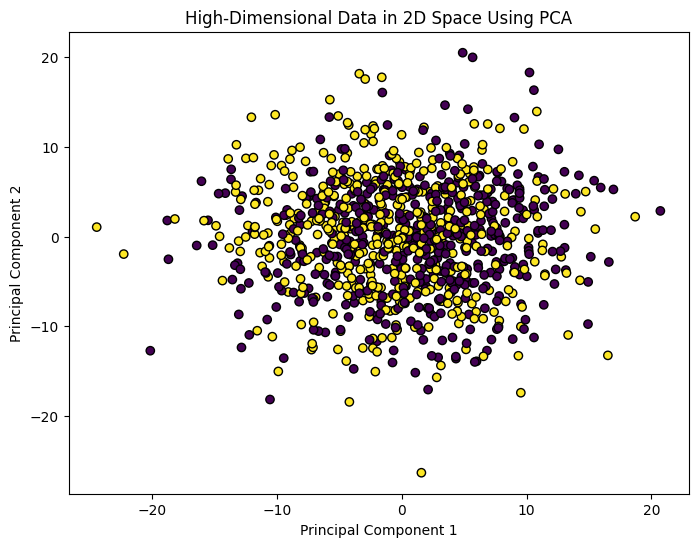

In [14]:
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o')
plt.title("High-Dimensional Data in 2D Space Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## Evaluating SVM Models
Evaluating the performance of Support Vector Machine (SVM) models is crucial for understanding how well they generalize to new data. In this section, we will explore key metrics for evaluating SVM models, including accuracy, precision, recall, and ROC curves. By applying these metrics, we can assess the strengths and weaknesses of our SVM models and make informed decisions about their deployment.

### Getting Ready
Before evaluating SVM models, let’s ensure we have the necessary Python libraries installed and the dataset loaded:

In [15]:
# Load the libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)


### How to Do It...
Now let's implement SVM and evaluate its performance using various metrics.

In [16]:
# Load the model
svm_model = SVC(kernel='linear', probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Stylize the DataFrame
styled_report_df = (report_df
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}', 
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)

print(f"Accuracy: {accuracy:.2f}")
styled_report_df


Accuracy: 0.75


,precision,recall,f1-score,support
0,0.926,0.940,0.933,67
1,0.961,0.952,0.957,104
accuracy,0.947,0.947,0.947,1
macro avg,0.944,0.946,0.945,171
weighted avg,0.948,0.947,0.947,171


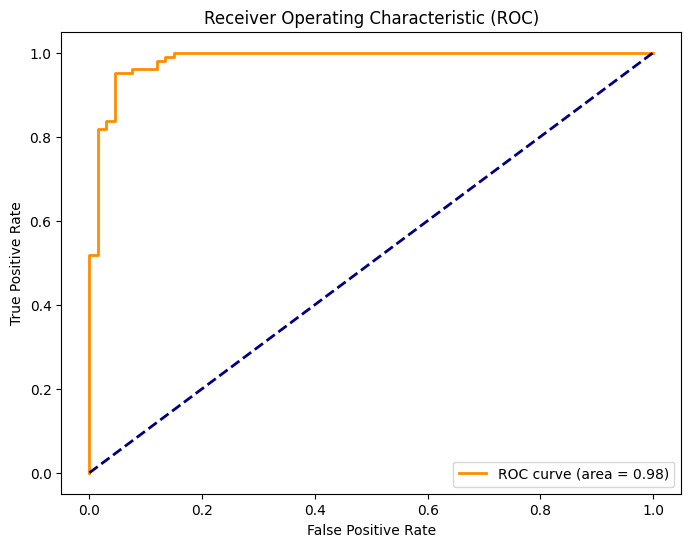

In [17]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## How It Works...

Evaluating SVM models involves assessing their performance using various metrics:
•	Accuracy: Measures the proportion of correctly classified instances.
•	Precision: Measures the proportion of true positives among all predicted positive instances.
•	Recall: Measures the proportion of true positives among all actual positive instances.
•	F1 Score: The harmonic mean of precision and recall, providing a balanced measure of both.
•	ROC Curve: Plots the true positive rate against the false positive rate at different thresholds, providing a comprehensive view of the model's performance across all possible thresholds.
•	AUC (Area Under the Curve): Quantifies the overall ability of the model to distinguish between positive and negative classes.


## Practical Exercises with SVMs

In this final section, we will engage in practical exercises that involve building, tuning, and evaluating SVM models on various datasets. These exercises are designed to reinforce the concepts learned throughout the chapter and demonstrate how to effectively apply SVMs in different scenarios. By the end of this section, we will have hands-on experience that can be leveraged in our own ML projects.

### Exercise 1: Building a Simple SVM Classifier
In this exercise, we will build a simple SVM classifier using the Iris dataset.

In [18]:
# Load libraries
YOUR CODE HERE

# Load the dataset
YOUR CODE HERE

# Split the data
YOUR CODE HERE

# Create and train a SVM classifier
YOUR CODE HERE

# Make predictions
YOUR CODE HERE

# Evaluate performance
YOUR CODE HERE


SyntaxError: invalid syntax (1884649385.py, line 2)

### Exercise 2: Tuning SVM Parameters with Grid Search
In this exercise, we will tune SVM parameters using grid search on the Breast Cancer dataset.


In [ ]:
# Load the libraries
YOUR CODE HERE

# Load the dataset
YOUR CODE HERE

# Split the data
YOUR CODE HERE

# Define a hyperparameter for grid search
YOUR CODE HERE

# Perform grid search with cross-validation
YOUR CODE HERE

# Train a new model with the best hyperparameters
YOUR CODE HERE

# Make predictions with the best model
YOUR CODE HERE

# Evaluate the best model
YOUR CODE HERE


### Exercise 3: Visualizing SVM Decision Boundaries
In this exercise, we will visualize the decision boundaries of an SVM model trained on a synthetic dataset.

In [ ]:
# Load libraries for visualization and dataset creation
YOUR CODE HERE

# Create a synthetic dataset for binary classification
YOUR CODE HERE

# Split the data
YOUR CODE HERE

# Create and train an SVM model
YOUR CODE HERE

# Create a mesh grid for plotting decision boundaries
YOUR CODE HERE

# Predict class probabilities across the grid
YOUR CODE HERE

# Plot decision boundaries
YOUR CODE HERE
